# HW5

## First of all we create the functions that creates the graph we need (and save the cleaned dataframe to have it in when we need)

In [2]:
import func_1 as f1
import func_3 as f3
import pandas as pd
import csv
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pylab import *
import itertools

In [3]:
all_nodes = []

# clean data of coordinates and append nodes in list
with open('C:\\Users\\bo\\Desktop\\Laura\\Istruzione\\Data Science\\Algorithmic Methods of Data Mining\\Homeworks\\HW5\\USA-road-d.CAL.co', 'r') as inp,\
        open('C:\\Users\\bo\\Desktop\\Laura\\Istruzione\\Data Science\\Algorithmic Methods of Data Mining\\Homeworks\\HW5\\cle_USA-road-d.CAL.co.csv', 'w') as out:
#with open('/Users/caterina/PycharmProjects/ADM5/USA-road-d.CAL.co', 'r') as inp,\
#        open('/Users/caterina/PycharmProjects/ADM5/cle_USA-road-d.CAL.co.csv', 'w') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
        if row[0][0] == "v":
            writer.writerow(row)
            tmp = row[0].split()
            all_nodes.append(int(tmp[1]))
#print("Number of points:", len(all_nodes))

In [4]:
# create dataFrame for file USA-road-d.CAL.co
usaCoordDf = pd.read_csv('C:\\Users\\bo\\Desktop\\Laura\\Istruzione\\Data Science\\Algorithmic Methods of Data Mining\\Homeworks\\HW5\\cle_USA-road-d.CAL.co.csv', sep=' ', delimiter=None, header=None)
#usaCoordDf = pd.read_csv('/Users/caterina/PycharmProjects/ADM5/cle_USA-road-d.CAL.co.csv', sep=' ', delimiter=None, header=None)
usaCoordDf = usaCoordDf.drop(usaCoordDf.columns[0], axis=1)
usaCoordDf.columns = ["node", "coord1", "coord2"]
usaCoordDf.set_index('node', inplace=True)

usaCoordDf


,coord1,coord2
node,,
1,-114315309,34133550
2,-114223946,34176221
3,-114307299,34148791
4,-114318765,34138889
5,-114347300,34042614
...,...,...
1890811,-114010850,37121318
1890812,-114027219,37120524
1890813,-114022545,37121222


In [5]:
#print(usaCoordDf.loc[1, :], type(usaCoordDf.loc[1, :]), dict(usaCoordDf.loc[1, :]))
#print(usaCoordDf.loc[1, "coord1"])

In [20]:
# Clean data of distances and creating the distance-weighted graph and the graph without weights (base graph)
def create_graph_d_base(g_dist, g_base):
    
    with open('C:\\Users\\bo\\Desktop\\Laura\\Istruzione\\Data Science\\Algorithmic Methods of Data Mining\\Homeworks\\HW5\\USA-road-d.CAL.gr', 'r') as inp:#,\
    #with open('/Users/caterina/PycharmProjects/ADM5/USA-road-d.CAL.gr', 'r') as inp:#,\
            #open('C:\\Users\\bo\\Desktop\\Laura\\Istruzione\\Data Science\\Algorithmic Methods of Data Mining\\Homeworks\\HW5\\cle_USA-road-d.CAL.csv', 'w') as out:
        #writer = csv.writer(out)
        for row in csv.reader(inp):
            if row[0][0] == "a":
                #writer.writerow(row)
                tmp = row[0].split()
                c1 = int(usaCoordDf.loc[int(tmp[1]), "coord1"])
                c2 = int(usaCoordDf.loc[int(tmp[1]), "coord2"])
                pos=[c1,c2]
                g_dist.add_edge(int(tmp[1]), int(tmp[2]), weight=int(tmp[3]))
                g_base.add_edge(int(tmp[1]), int(tmp[2]), weight=1)
                g_dist.add_node(int(tmp[1]), p=pos)#c1, c2=c2)
                g_base.add_node(int(tmp[1]), p=pos)#c1=c1, c2=c2)
    return g_dist,g_base


    #print("Number of nodes base:", len(g_base.nodes))
    #print("Number of edges base:", len(g_base.edges))
    #print("Number of nodes dist:", len(g_dist.nodes))
    #print("Number of edges dist:", len(g_dist.edges))


In [7]:
# Create dataFrame for file USA-road-d.CAL.gr

#usaDistanceDf = pd.read_csv('C:\\Users\\bo\\Desktop\\Laura\\Istruzione\\Data Science\\Algorithmic Methods of Data Mining\\Homeworks\\HW5\\cle_USA-road-d.CAL.csv', sep=' ', delimiter=None)#, header=None)
#usaDistanceDf = usaDistanceDf.drop(usaDistanceDf.columns[0], axis=1)
#usaDistanceDf.columns = ["node1", "node2", "dist"]

#usaDistanceDf = usaDistanceDf.iloc[::2]
#usaDistanceDf.to_json('C:\\Users\\bo\\Desktop\\Laura\\Istruzione\\Data Science\\Algorithmic Methods of Data Mining\\Homeworks\\HW5\\dist.json')
#usaDistanceDf

In [21]:
# Clean data of times and creating the time-weighted graph

def create_graph_time(g_time):
    
    with open('C:\\Users\\bo\\Desktop\\Laura\\Istruzione\\Data Science\\Algorithmic Methods of Data Mining\\Homeworks\\HW5\\USA-road-t.CAL.gr', 'r') as inp:#,\
            #open('C:\\Users\\bo\\Desktop\\Laura\\Istruzione\\Data Science\\Algorithmic Methods of Data Mining\\Homeworks\\HW5\\cle_USA-road-t.CAL.csv', 'w') as out:
        #writer = csv.writer(out)
        for row in csv.reader(inp):
            if row[0][0] == "a":
                #writer.writerow(row)
                tmp = row[0].split()
                c1 = int(usaCoordDf.loc[int(tmp[1]), "coord1"])
                c2 = int(usaCoordDf.loc[int(tmp[1]), "coord2"])
                pos=[c1,c2]
                g_time.add_edge(int(tmp[1]), int(tmp[2]), weight=int(tmp[3]))
                g_time.add_node(int(tmp[1]), p=pos)#c1, c2=c2)

    return g_time
    #print("Number of nodes time:", len(g_time.nodes))
    #print("Number of edges time:", len(g_time.edges))


In [10]:
#plt.figure(figsize=(20,20))
#plt.scatter(usaCoordDf['coord1'], usaCoordDf['coord2'], color='gray')
#draw_networkx(g_dist, pos=nx.get_node_attributes(g_dist,'p'), with_labels=False, node_size=0.01)
#nx.draw_networkx_nodes(g_vis,pos, nodelist=[1], node_color='g', node_size=100)
#plt.show()


## Let's create the graphs and plot graph for distance to visualize our "map"

C:\Users\bo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


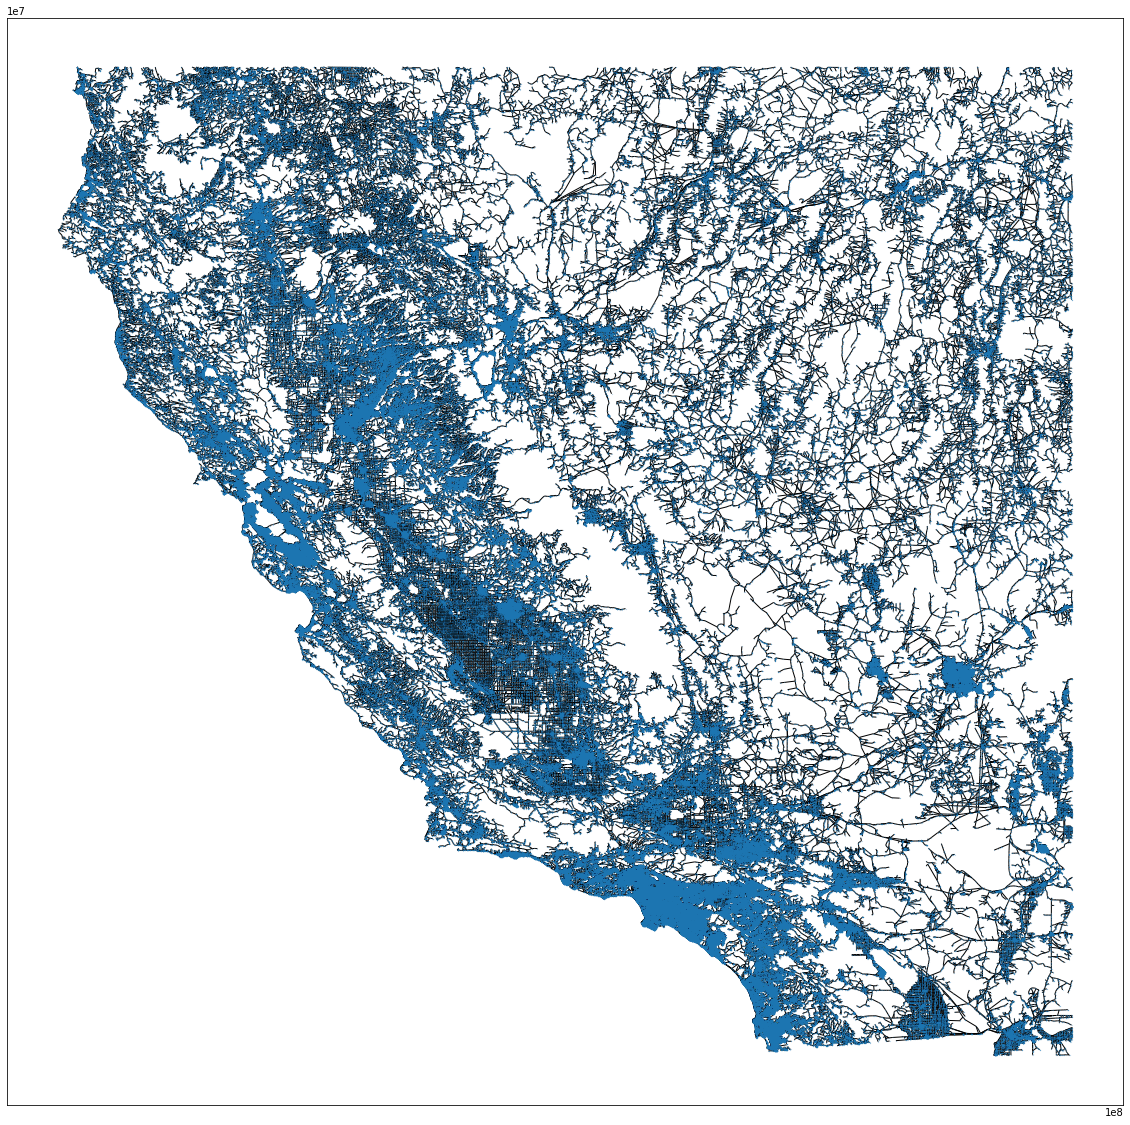

In [22]:
g_dist = nx.Graph()
g_base = nx.Graph()
g_time = nx.Graph()
g_dist,g_base=create_graph_d_base(g_dist,g_base)
g_time=create_graph_time(g_time)

plt.figure(figsize=(20,20))
draw_networkx(g_dist, pos=nx.get_node_attributes(g_dist,'p'), with_labels=False, node_size=0.01)
plt.show()


In [9]:
# Create dataFrame for file USA-road-t.CAL.gr

#usaTimeDf = pd.read_csv('C:\\Users\\bo\\Desktop\\Laura\\Istruzione\\Data Science\\Algorithmic Methods of Data Mining\\Homeworks\\HW5\\cle_USA-road-t.CAL.csv', sep=' ', delimiter=None, header=None)
#usaTimeDf = usaTimeDf.drop(usaTimeDf.columns[0], axis=1)
#usaTimeDf.columns = ["node1", "node2", "time_d"]

#usaTimeDf = usaTimeDf.iloc[::2]
#usaTimeDf.to_json('C:\\Users\\bo\\Desktop\\Laura\\Istruzione\\Data Science\\Algorithmic Methods of Data Mining\\Homeworks\\HW5\\time_d.json')
#usaTimeDf



# Functionality 1 - Find the Neighbours! 
### We also try the function with choosen parameters to check the correctness

In [23]:
def func1(v,dist,d):
    visited=[v]
    ourD=0
    if dist=='t(x,y)':
        vis=f1.func_1(g_time, visited, v, d, ourD)
    elif dist=='d(x,y)':
        vis=f1.func_1(g_dist, visited, v, d, ourD)
    elif dist=='network_distance':
        vis=f1.func_1(g_base, visited, v, d, ourD) 
    else: 
        print('distance error')
    return vis

In [25]:
chosen_dist='d(x,y)'
vis=func1(1,chosen_dist,10000000)
vis

[1,
 1048577,
 1766,
 1048579,
 3,
 1049931,
 1690,
 1049932,
 1691,
 1692,
 1049946,
 1050835,
 2820,
 1694,
 1693,
 1049944,
 1708,
 451,
 1048937,
 1050870,
 1707,
 1705,
 1706,
 2825,
 1050839,
 1786,
 1050009,
 2821,
 1049943,
 1049941,
 1702,
 1701,
 1049940,
 1049951,
 1715,
 1049950,
 1714,
 1049949,
 1049948,
 1712,
 1049947,
 1713,
 1049921,
 1677,
 1678,
 1679,
 1050471,
 1833,
 1050044,
 1623,
 1049878,
 1049877,
 1621,
 1598,
 1597,
 1049856,
 1595,
 1049855,
 1594,
 1583,
 1582,
 1049845,
 1589,
 1049850,
 1049842,
 1049841,
 1578,
 1050040,
 1049824,
 1558,
 1049825,
 1559,
 1049826,
 1560,
 1049827,
 1561,
 1049828,
 1562,
 1049829,
 1563,
 1049830,
 1564,
 1049831,
 1565,
 1049832,
 1049833,
 1566,
 1567,
 1049834,
 1568,
 1050035,
 1822,
 1050036,
 1826,
 1574,
 1049837,
 1573,
 1049836,
 1569,
 1570,
 1049839,
 1575,
 1049838,
 1049816,
 1548,
 1049817,
 1549,
 1557,
 1542,
 1049814,
 1543,
 1514805,
 1550,
 1504444,
 1504342,
 1504334,
 567426,
 1504333,
 567419,
 1

# Visualization 1 - Visualize the Neighbours!

### We'll visualize first the result on the generic map to understand the localization

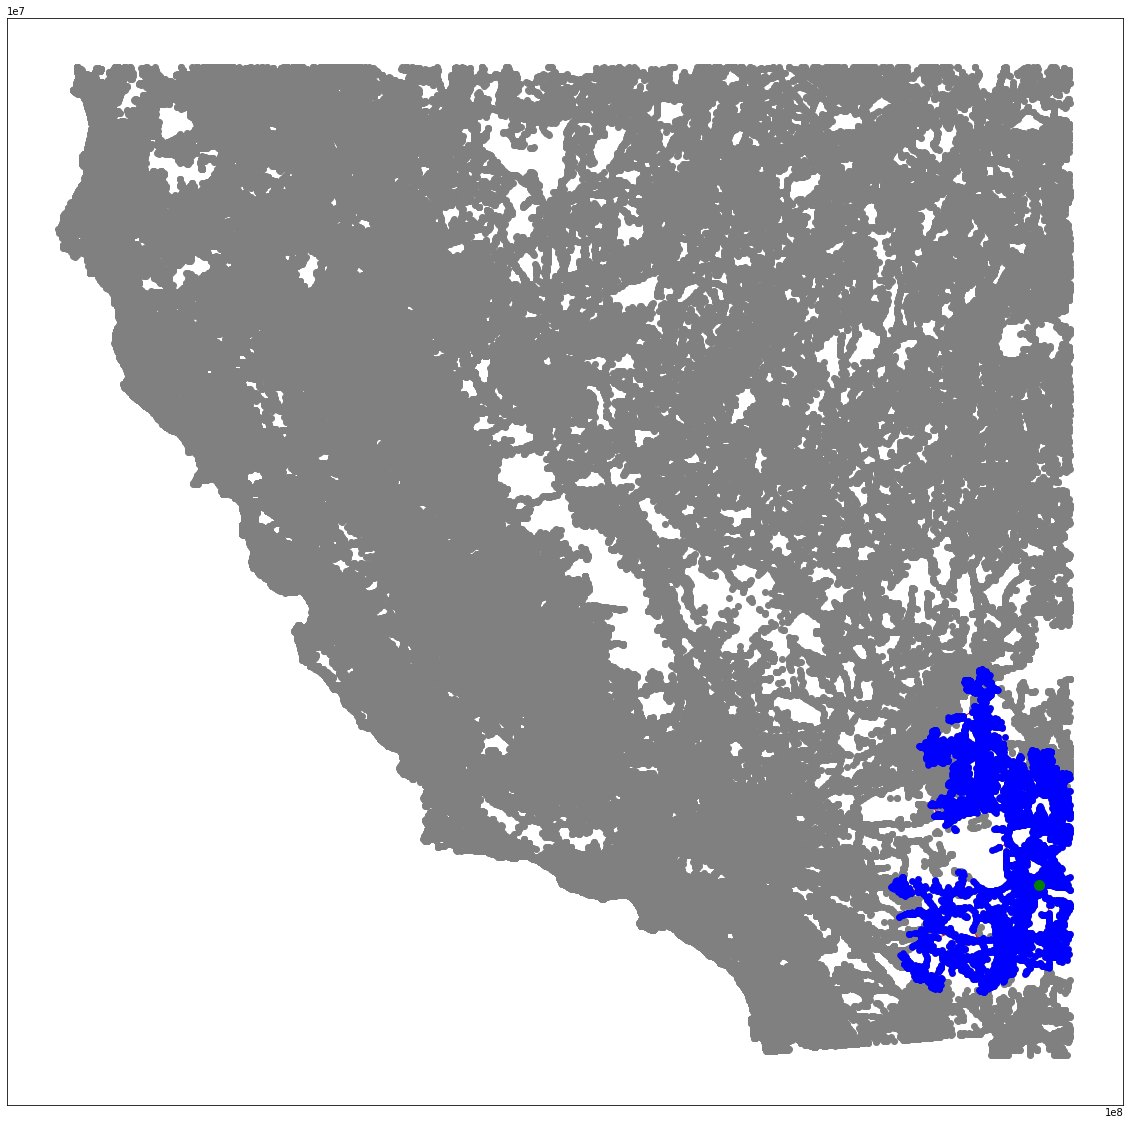

In [26]:
g_vis=g_base.subgraph(vis)
plt.figure(figsize=(20,20))
pos=nx.get_node_attributes(g_vis,'p')
plt.scatter(usaCoordDf['coord1'], usaCoordDf['coord2'], color='gray')
draw_networkx(g_vis, pos, with_labels=False, node_size=30, node_color='b', edge_color='r')
nx.draw_networkx_nodes(g_vis,pos, nodelist=[1], node_color='g', node_size=100)
plt.show()

### We'll visualize now the result without the map, choosing the right color for edges, according to the distance function.

To understand the colors see NOTE 1 

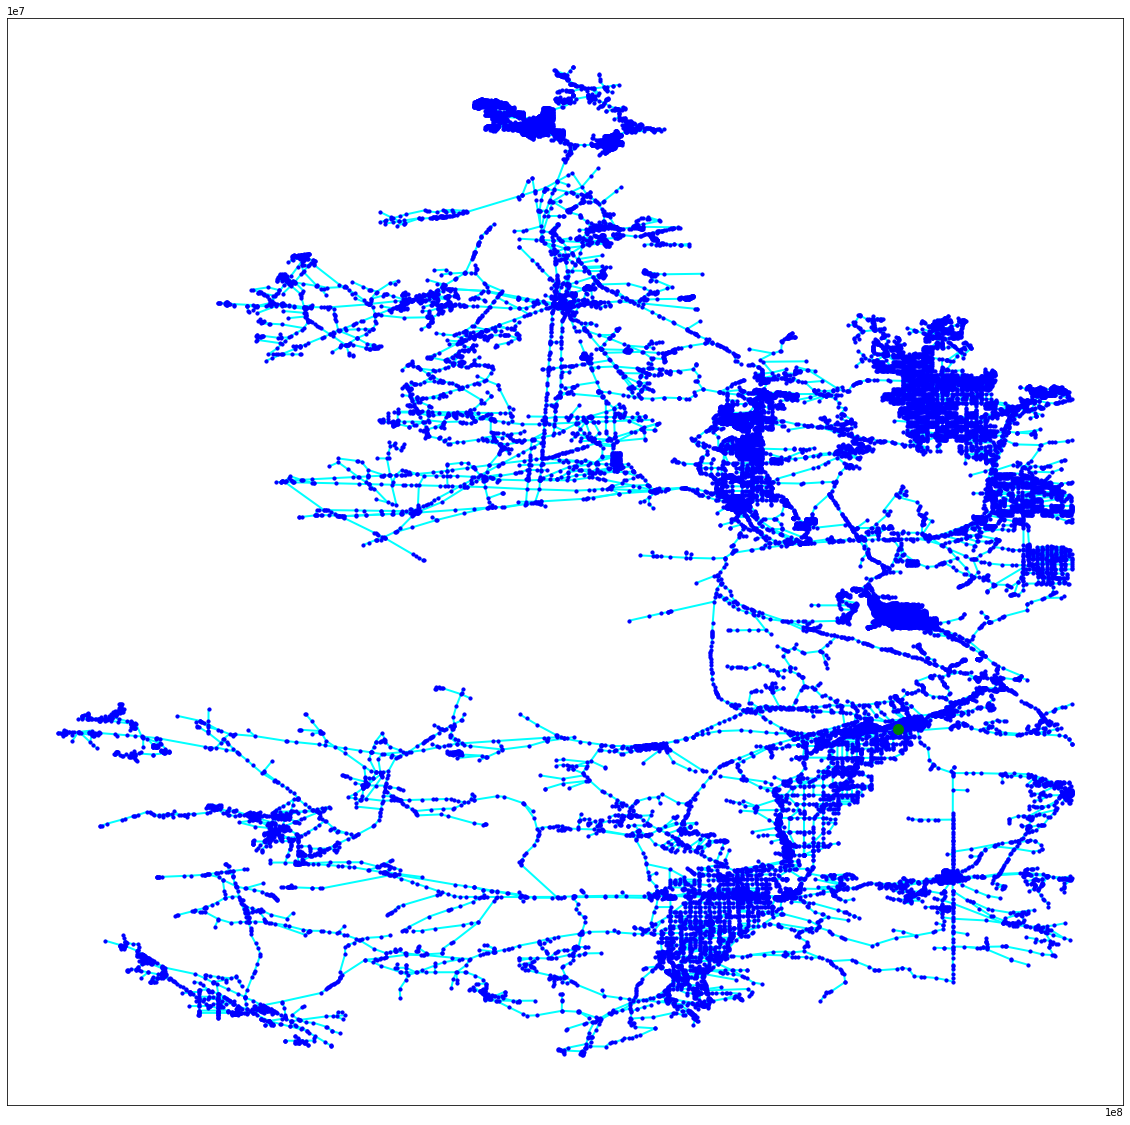

In [36]:
g_vis=g_base.subgraph(vis)
plt.figure(figsize=(20,20))
pos=nx.get_node_attributes(g_vis,'p')
# choose the right color for edge
dist_color='black'
if chosen_dist=='t(x,y)':
    dist_color='red'
elif chosen_dist=='d(x,y)':
    dist_color='yellow'
elif chosen_dist=='network_distance':
    dist_color='cyan'
draw_networkx(g_vis, pos, with_labels=False, node_size=10, node_color='b', width=2, edge_color=dist_color)
nx.draw_networkx_nodes(g_vis,pos, nodelist=[1], node_color='g', node_size=100)
plt.show()

## Functionality 2 - Find the smartest Network!


In [37]:
def func_path(graph, node, dest_list, min_w=None):
    
    if min_w == None: min_w = float("Inf")
    ret=[]
    p = 0
    l = f3.func_3(graph, node, dest_list[0])
    if l!=('Not possible'):
        p += l[0]
        if p < min_w:
            for i in l[1]:
                ret.append(i)
        else: 
            return "Too expensive"
    else: 
        ret=[('Not possible')]
        return ret
    for n in range( len(dest_list)-1):
        l = f3.func_3(graph, dest_list[n], dest_list[n+1])
        if l!=('Not possible'):
            p += l[0]
            if p < min_w:
                for i in l[1][1:]:
                    ret.append(i)
            else: 
                return "Too expensive"
        else:
            ret=[('Not possible')]
            return ret

    return (ret, p)


In [42]:
def func_2(graph, to_visit):
    perm = list(itertools.permutations(to_visit))
    final = ([], float("Inf"))
    for p in perm:
        tmp = func_path(graph, p[0], p[1:], final[1])
        if tmp != "Too expensive": 
            if tmp[0] != ('Not possible') and tmp[1] < final[1]:
                final = tmp
            if tmp[0] == ('Not possible'):
                return ("Not possible")
        else: print("Too expensive")
    if final == ([], float("Inf")):
        return ("Not possible")
    return final


In [43]:
def func2(dist, l):
    if dist=='t(x,y)':
        vis=func_2(g_time, l)
    elif dist=='d(x,y)':
        vis=func_2(g_dist, l)
    elif dist=='network_distance':
        vis=func_2(g_base, l)
    else: 
        print('distance error')
    return vis
    

In [44]:
l=[1,451,1049889, 1690]
d = func2('d(x,y)', l)
d

Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive


([451,
  1823,
  1050019,
  1800,
  1050017,
  1050018,
  1799,
  1050022,
  1802,
  1803,
  1,
  1048577,
  1766,
  1048579,
  3,
  1049931,
  1690,
  1049947,
  1714,
  1049950,
  1715,
  1050045,
  1049938,
  1700,
  1681,
  305,
  1671,
  1049912,
  1668,
  1049909,
  1646,
  1049894,
  1049890,
  1639,
  1049889],
 53819)

## Visualization 2 - Visualize the smartest Network!

### We'll visualize first the result on the generic map to understand the localization

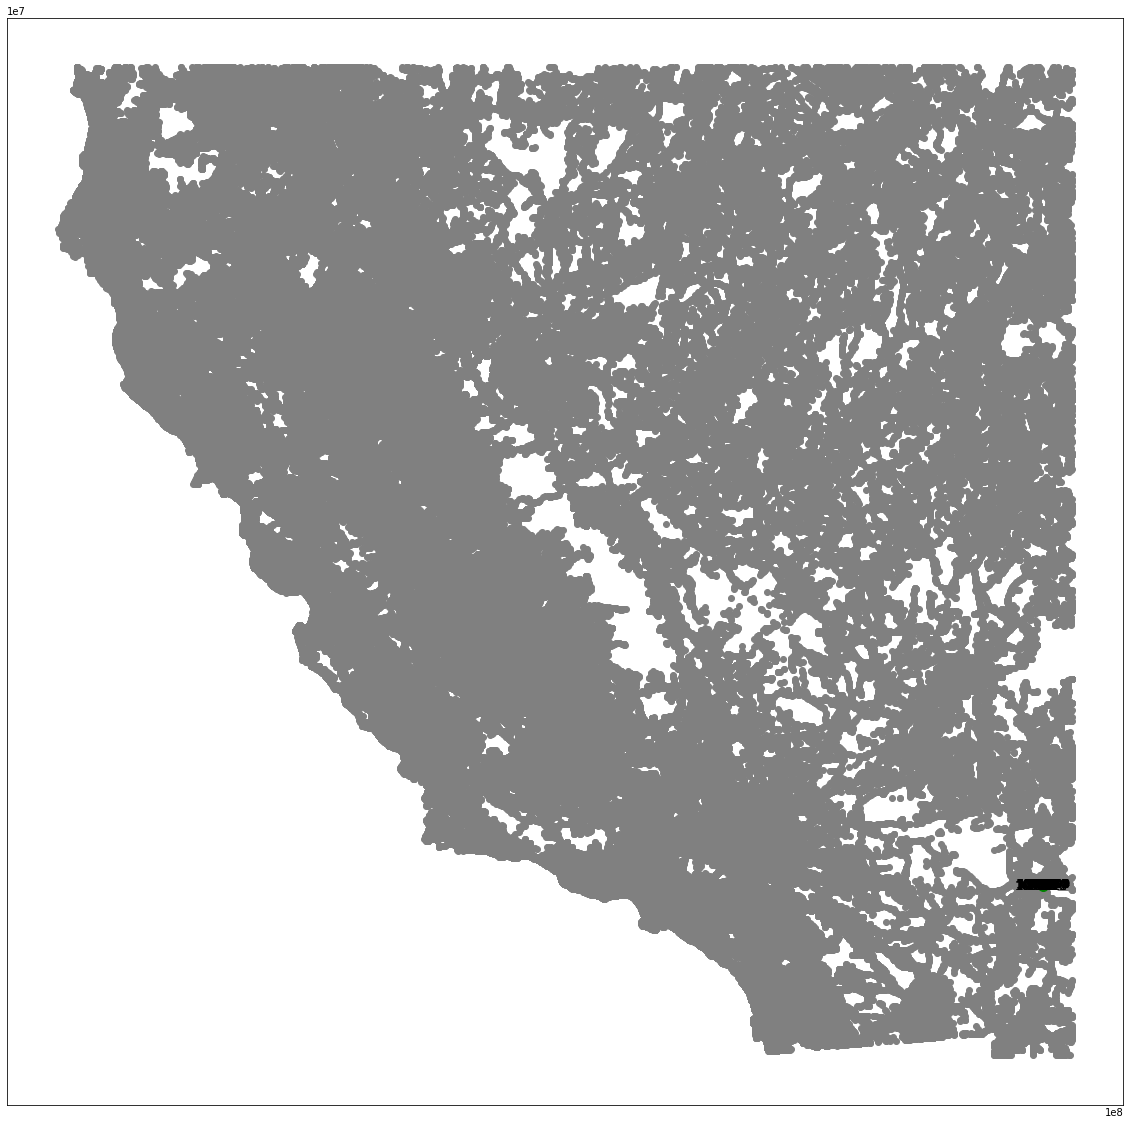

In [52]:
g_vis=g_base.subgraph(d[0])
plt.figure(figsize=(20,20))
pos=nx.get_node_attributes(g_vis,'p')
plt.scatter(usaCoordDf['coord1'], usaCoordDf['coord2'], color='gray')
draw_networkx(g_vis, pos, with_labels=True, node_size=30, node_color='b', edge_color='r')
nx.draw_networkx_nodes(g_vis,pos, nodelist=l, node_color='g', node_size=100)
plt.show()



### We'll visualize now the result without the map, choosing the right color for edges, according to the distance function.

To understand the colors see NOTE 1 

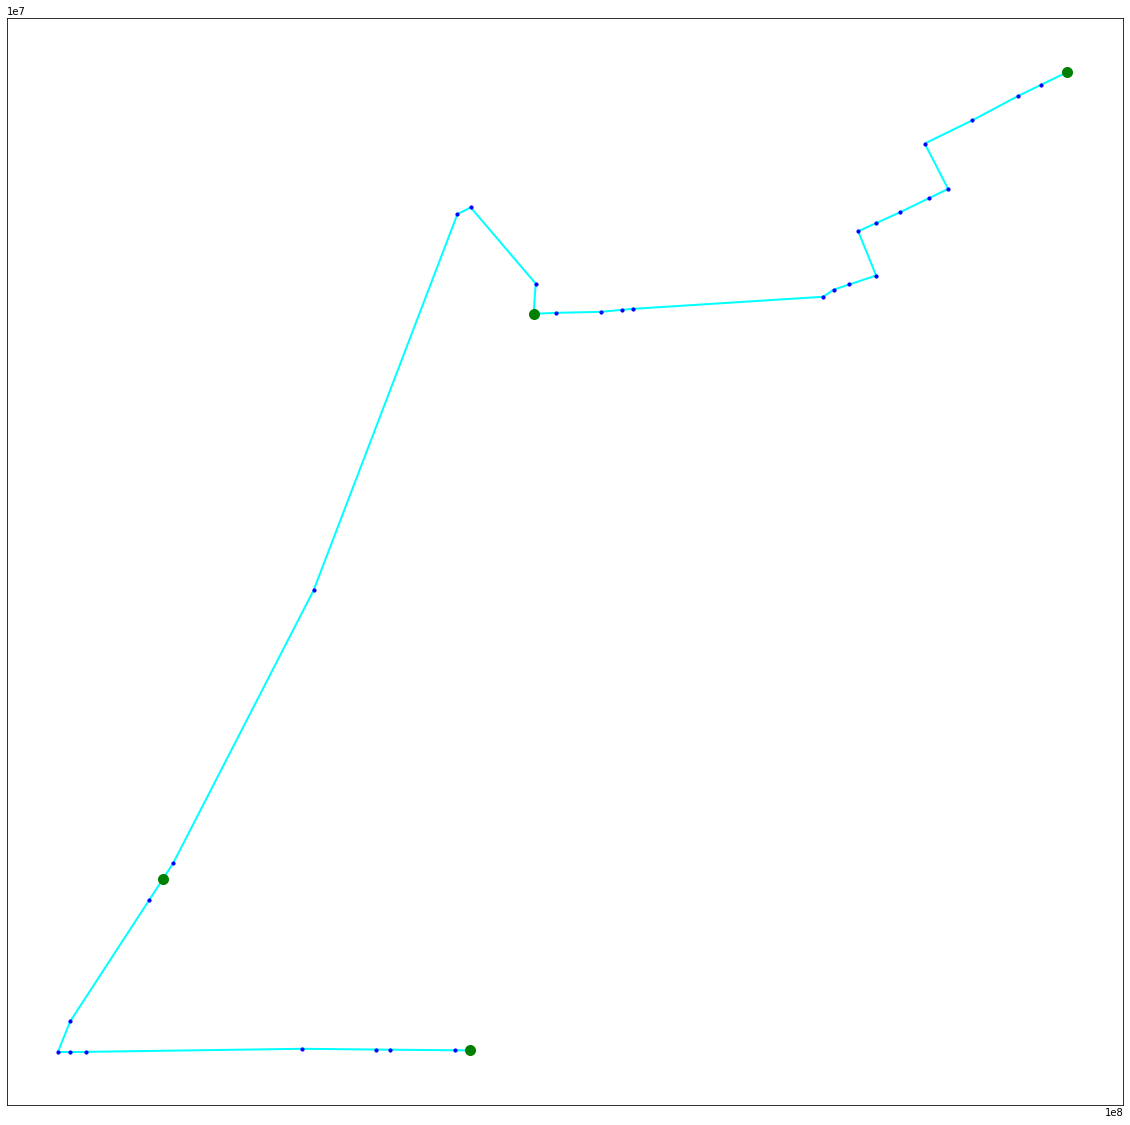

In [53]:
g_vis=g_base.subgraph(d[0])
plt.figure(figsize=(20,20))
pos=nx.get_node_attributes(g_vis,'p')
# choose the right color for edge
dist_color='black'
if chosen_dist=='t(x,y)':
    dist_color='red'
elif chosen_dist=='d(x,y)':
    dist_color='yellow'
elif chosen_dist=='network_distance':
    dist_color='cyan'
draw_networkx(g_vis, pos, with_labels=False, node_size=10, node_color='b', width=2, edge_color=dist_color)
nx.draw_networkx_nodes(g_vis,pos, nodelist=l, node_color='g', node_size=100)
plt.show()

## Functionality 3 - Shortest Ordered Route 

In [54]:
def func3(v,d,dist):
    if dist=='t(x,y)':
        vis=func_path(g_time, v, d)[0]
    elif dist=='d(x,y)':
        vis=func_path(g_dist, v, d)[0]
    elif dist=='network_distance':
        vis=func_path(g_base, v, d)[0] 
    else: 
        print('distance error')
    return vis
    

In [55]:
dest_list=[1048577, 1690, 1692, 1694, 1048937,1715]
res= func3(1, dest_list,'network_distance')
res

[1,
 1048577,
 1766,
 1048579,
 3,
 1049931,
 1690,
 1049932,
 1691,
 1692,
 1050835,
 1694,
 1693,
 1049944,
 1708,
 451,
 1048937,
 451,
 1708,
 1049944,
 1693,
 1694,
 1050835,
 1692,
 1691,
 1049932,
 1690,
 1049947,
 1714,
 1049950,
 1715]

## Visualization 3 - Visualize the Shortest Ordered Route

### We'll visualize first the result on the generic map to understand the localization

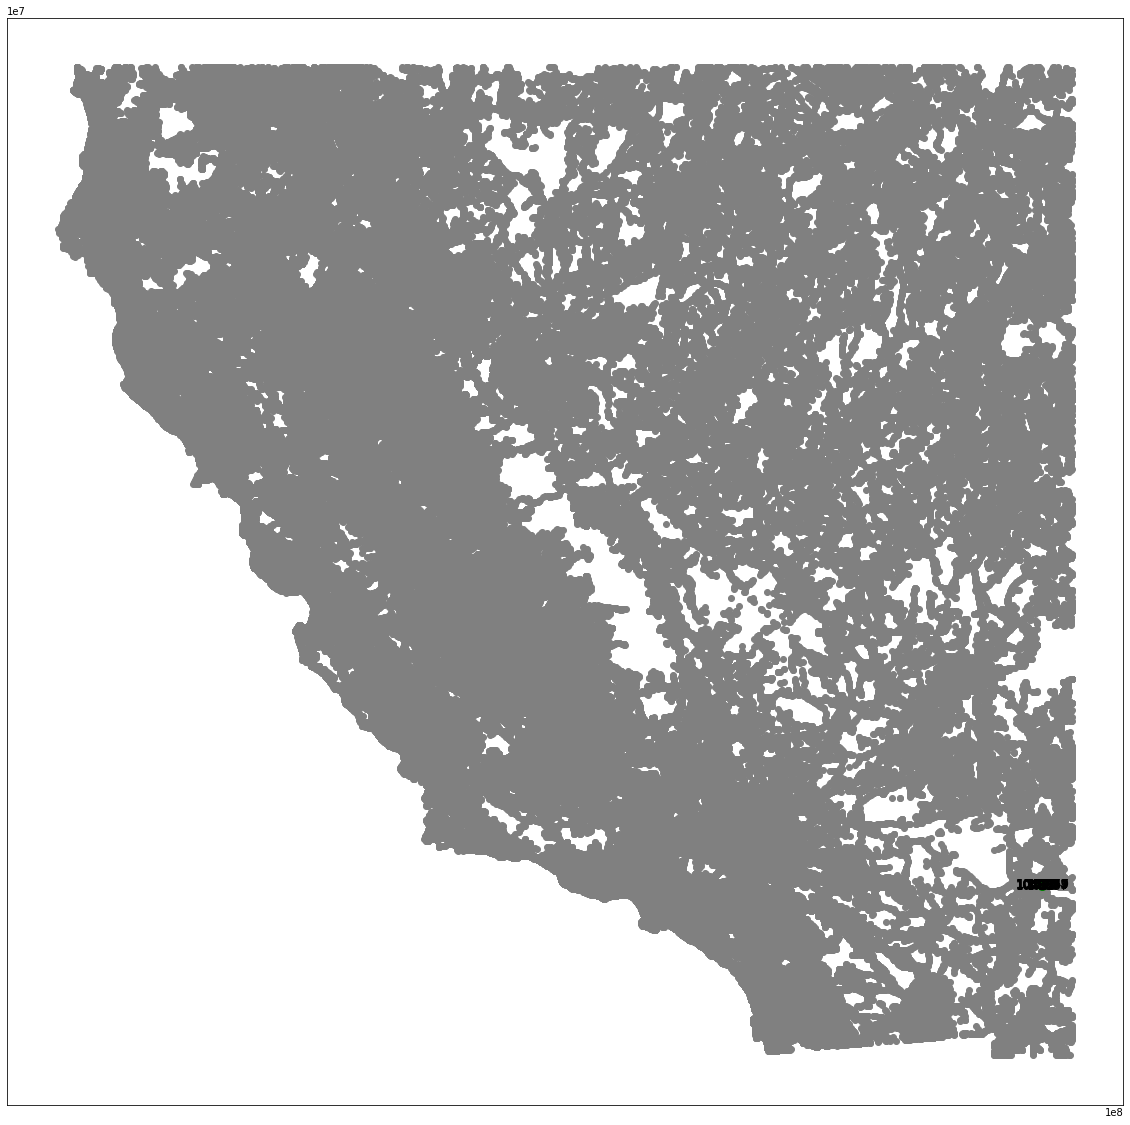

In [59]:
g_vis=g_base.subgraph(res)
plt.figure(figsize=(20,20))
pos=nx.get_node_attributes(g_vis,'p')
plt.scatter(usaCoordDf['coord1'], usaCoordDf['coord2'], color='gray')
draw_networkx(g_vis, pos, with_labels=True, node_size=30, node_color='b', edge_color='r')
nx.draw_networkx_nodes(g_vis,pos, nodelist=[1], node_color='g', node_size=100)
plt.show()



### We'll visualize now the result without the map, choosing the right color for edges, according to the distance function.

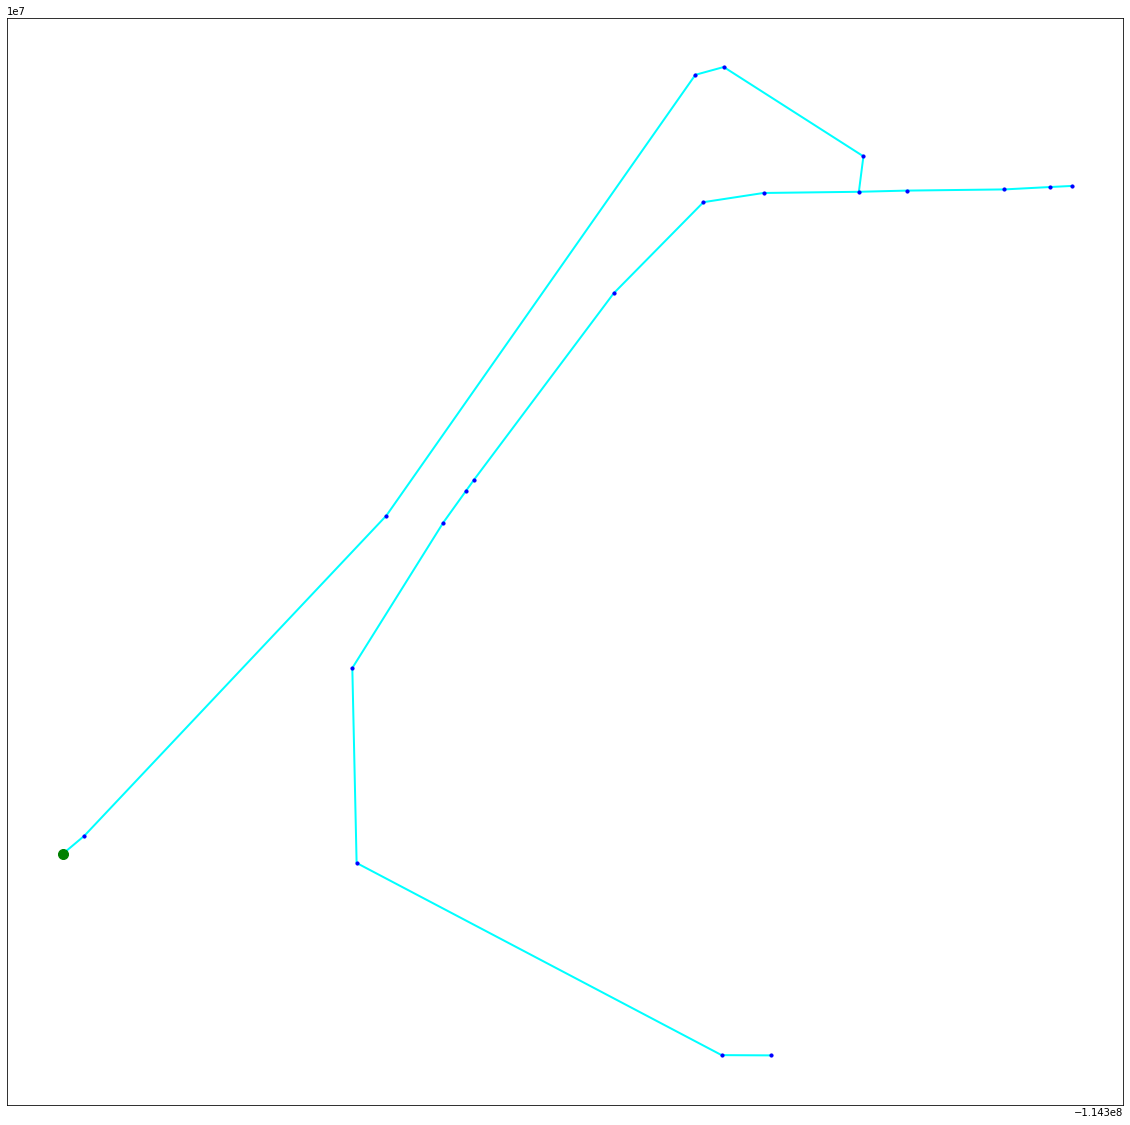

In [57]:
g_vis=g_base.subgraph(res)
plt.figure(figsize=(20,20))
pos=nx.get_node_attributes(g_vis,'p')
# choose the right color for edge
dist_color='black'
if chosen_dist=='t(x,y)':
    dist_color='red'
elif chosen_dist=='d(x,y)':
    dist_color='yellow'
elif chosen_dist=='network_distance':
    dist_color='cyan'
draw_networkx(g_vis, pos, with_labels=False, node_size=10, node_color='b', width=2, edge_color=dist_color)
nx.draw_networkx_nodes(g_vis,pos, nodelist=[1], node_color='g', node_size=100)
plt.show()

## Functionality 4 - Shortest Route

In [60]:
def inner_4(graph, start, to_visit):
    
    nodes = [start]+to_visit
    perm = list(itertools.permutations(nodes))
    perm = [x for x in perm if x[0]==start and x[-1]==to_visit[-1]]
    final = ([], float("Inf"))
    for p in perm:
        tmp = func_path(graph, p[0], p[1:], final[1])
        if tmp != "Too expensive": 
            if tmp[0] != ('Not possible') and tmp[1] < final[1]:
                final = tmp
            if tmp[0] == ('Not possible'):
                return ("Not possible")
        else: print("Too expensive")
    if final == ([], float("Inf")):
        return ("Not possible")
    return final



In [62]:
#l=[451,1049889, 1690, 1692,1050018]
#i4 = inner_4(g_dist, 1, l)
#i4 

In [63]:
def func4(start, nodes, dist):
    if dist=='t(x,y)':
        vis=inner_4(g_time, start, nodes)
    elif dist=='d(x,y)':
        vis=inner_4(g_dist,start, nodes )
    elif dist=='network_distance':
        vis=inner_4(g_base, start, nodes)
    else: 
        print('distance error')
    return vis

In [65]:
l=[451,1049889, 1690, 1692,1050018]
f4=func4(1, l, "d(x,y)")
f4

Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive
Too expensive


([1,
  1048577,
  1766,
  1048579,
  3,
  1049931,
  1050471,
  1679,
  1049921,
  1647,
  1049897,
  1049898,
  1049879,
  1626,
  1624,
  1632,
  1630,
  1636,
  1049885,
  1049883,
  1049889,
  1639,
  1049890,
  1049894,
  1646,
  1049909,
  1668,
  1049912,
  1671,
  305,
  1681,
  1700,
  1049938,
  1050045,
  1715,
  1049950,
  1714,
  1049947,
  1690,
  1049932,
  1691,
  1692,
  1050835,
  1694,
  1693,
  1049944,
  1708,
  451,
  1823,
  1050019,
  1800,
  1050017,
  1050018],
 86630)

## Visualization 4 - Visualize the Shortest Route 

### We'll visualize first the result on the generic map to understand the localization

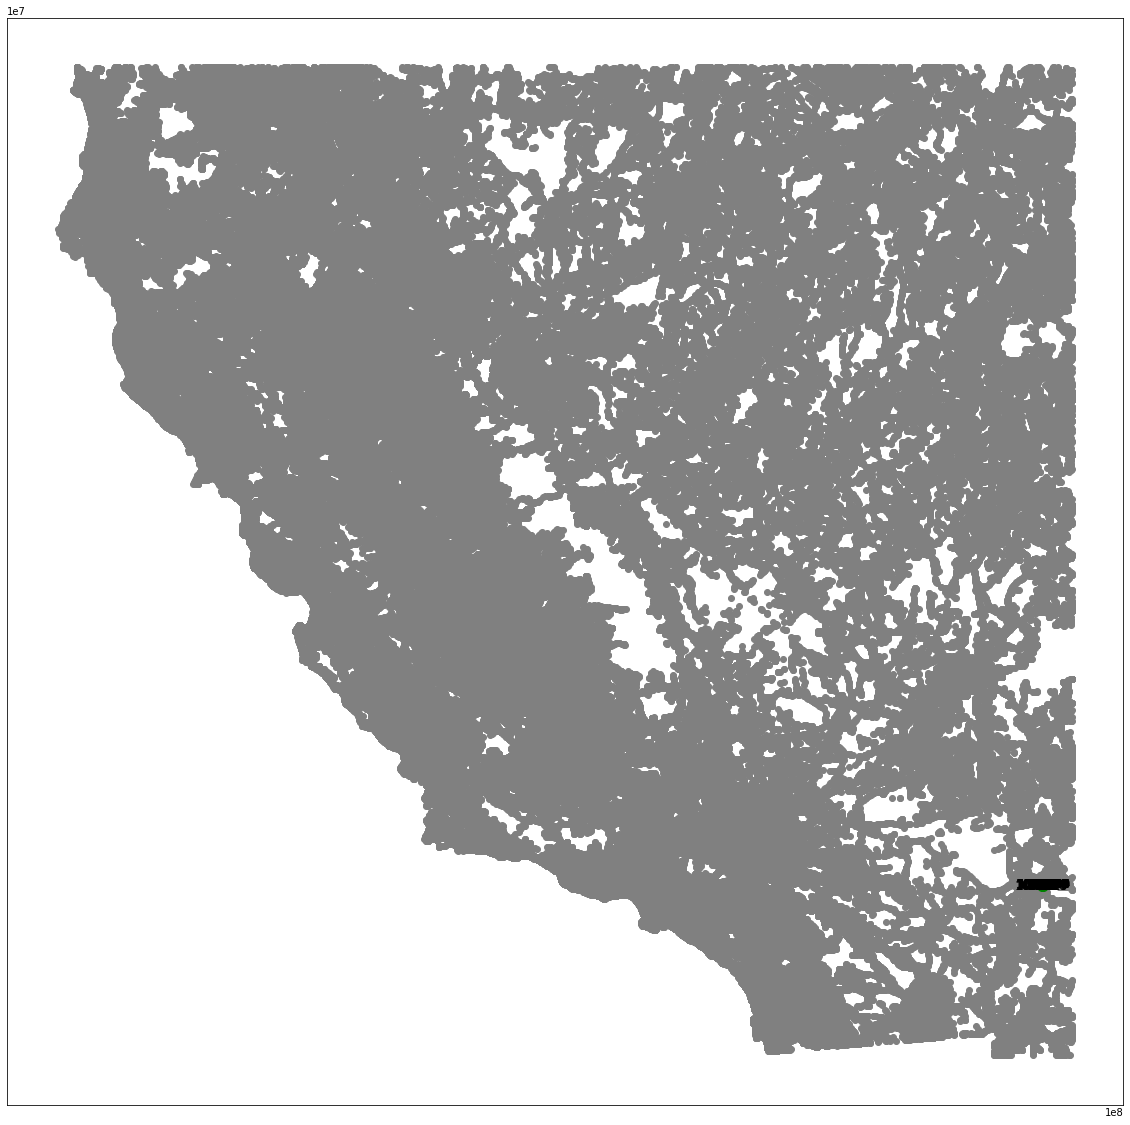

In [67]:
g_vis=g_base.subgraph(f4[0])
plt.figure(figsize=(20,20))
pos=nx.get_node_attributes(g_vis,'p')
plt.scatter(usaCoordDf['coord1'], usaCoordDf['coord2'], color='gray')
draw_networkx(g_vis, pos, with_labels=True, node_size=30, node_color='b', edge_color='r')
nx.draw_networkx_nodes(g_vis,pos, nodelist=l, node_color='g', node_size=100)
plt.show()

### We'll visualize now the result without the map, choosing the right color for edges, according to the distance function.

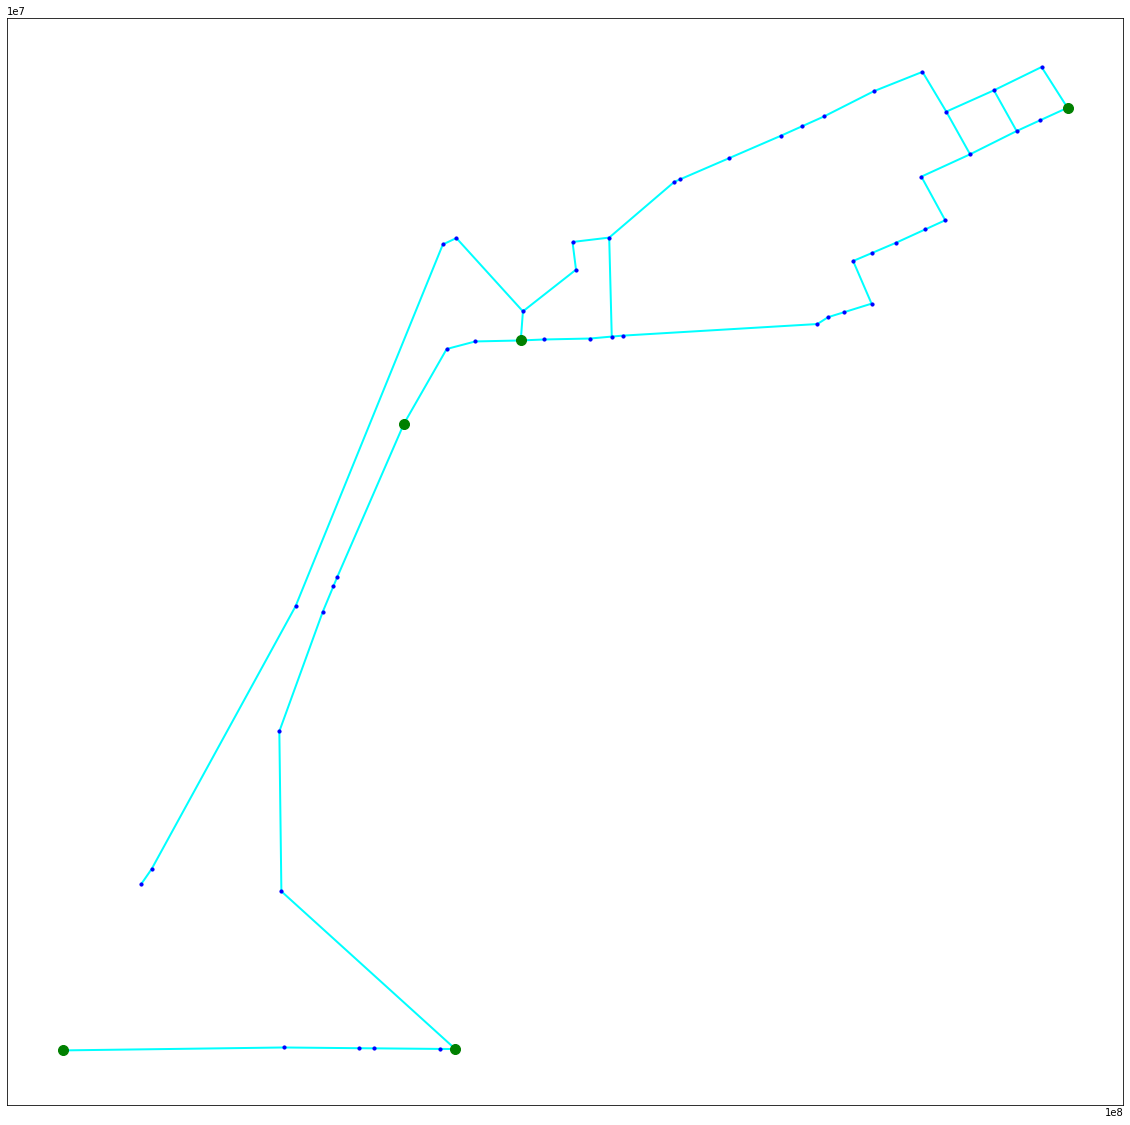

In [68]:
g_vis=g_base.subgraph(f4[0])
plt.figure(figsize=(20,20))
pos=nx.get_node_attributes(g_vis,'p')
# choose the right color for edge
dist_color='black'
if chosen_dist=='t(x,y)':
    dist_color='red'
elif chosen_dist=='d(x,y)':
    dist_color='yellow'
elif chosen_dist=='network_distance':
    dist_color='cyan'
draw_networkx(g_vis, pos, with_labels=False, node_size=10, node_color='b', width=2, edge_color=dist_color)
nx.draw_networkx_nodes(g_vis,pos, nodelist=l, node_color='g', node_size=100)
plt.show()

# Main function

In [ ]:
def main()

## Note 1
### Colors in plot

NODES:

Green=starting nodes

Blue=visited nodes


EDGES:

Red= t(x,y)

Yellow= d(x,y)

Cyan= network distance